<a href="https://colab.research.google.com/github/Fru-Adey/Image-Processing-for-deep-learning/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision
    Wikipedia describes computer vision as an interdicipliary scientific field that deals with how computers can gain high-level understanding from digital images and videos with the aim of automating tasks performed by the human visual system. 
    In this article, we will see how computers apprehend images and we were tackle our first automatic task by building a dummy model which uses  images to differentiate between day and night. A childs play for humans isn't it. 
    Buckle up because we are just getting started. By the time we are done, you reader will be equiped with state of art neural networks, image classification and pattern recognition techniques.


In [ ]:
## Image Manipulation and modeling

In [ ]:
# Import important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
import cv2
import helpers_
import random

In [ ]:
!pip install torchvision

## Nothing to images but numbers

   I Can't stress this enough. A friend once walked up to me and asked how we data scientist build models using images knowing fully well most machine learning algorithms only accept numerical data. I asked what he though images were. 
   Actually, the grayscale image, commongly known as black and white are simply a collection of pixels or squares in which every pixel has a value ranging from 0-255, with 0 being black (absence of all colors), 255 is white (presence of all colors) and grey being any where betwen. 
   Our computer visualizes it as a 2D array (grid) with a widht, height.Inverted axis with (0,0) aththe top left corner is used  is used to locate the position of any pixel in the image. Numpy  indexes come in very handy here. This opens a gateway to multiple manipulation techniques. I i can access any pixel in an image this means i can simply modify this pixel being any mathimatical operation, be it multiplication, addition, or subtraction. Now you understand how your photo can be transformed into superman in one of those fancy applications. Thank me later.

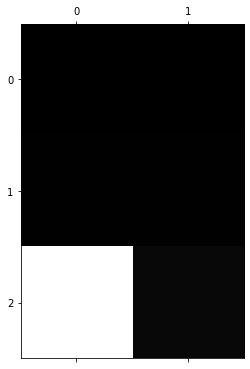

In [ ]:
#practice constructing a 2 dimensional image
img = np.array([[0,0],[1,1],[255,8]])
plt.matshow(img, cmap='gray')
#img

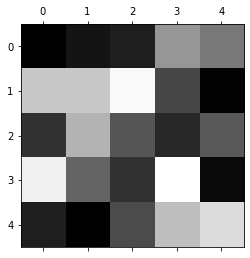

In [ ]:
# create a 5*5 image using grayscale (i demensional)
tiny_image = np.array([[0, 20, 30, 150, 120],
                      [200, 200, 250, 70, 3],
                      [50, 180, 85, 40, 90],
                      [240, 100, 50, 255, 10],
                      [30, 0, 75, 190, 220]])
plt.matshow(tiny_image, cmap='gray')

## Colour Images
I know what you are thinking. If grayscale images are that simple, what about colour images. Not that simple. Let'stake a look at the RGB (most common format of coloured images). As we saw above for gray scale, colour images are also reprented by an x,y grid of values but with a third parameter ( depth, z) which therefore transforms our grid into a cube. This depth are called channels which determine its colors. RGB images are made up of 3 colour channels Red, Green and Blue as its name indicates. Combined together we get a coloured image. No rocket science here. Coloure images are specifically important for classification tasks for reasons you shall see as you journey with me.  |

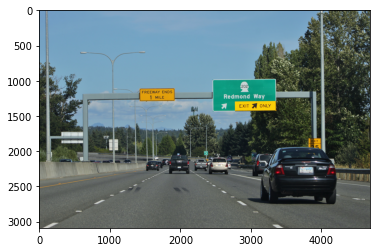

In [ ]:
#reading a jpg image 
image = mpimg.imread('images/wa_state_highway.jpg')
plt.imshow(image)

### RGB CHANNELS

#visualize the levels of each color channel. paying close attention to traffic signs.

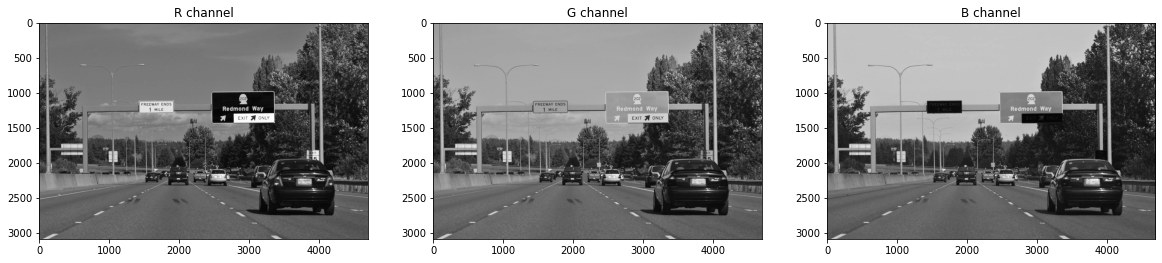

In [ ]:
# Isolate RGB channels
r = image [:, :,0]
g = image[:, :, 1]
b = image[:, :, 2]

#visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

## we can see clearly the area having the lowest value for red

### Color Threshold 

The objective of this section is to introduce the reader with a basic computer vision pipeline step which consists of isolating a particular area in an image using color information. Color thresholds will be used here specifically a blue screen. if a large blue area can be identified and replaced in an image, then two images can be layered. In computer graphics and video, a blue screen is used to capture images and videos and the blue background is then replaced with any background what so ever. fancy isn't it?. 

### here we read the image

In [ ]:
image = cv2.imread('images/pizza_bluescreen.jpg')

# Here we print a type of image and its dimensions ( hidht, width and the color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)

This image is: <class 'numpy.ndarray'>  with dimensions: (514, 816, 3)


### We then make a copy of the image.
    it is good practice to always keep copies of all items ensure tracability and minimize data loss.

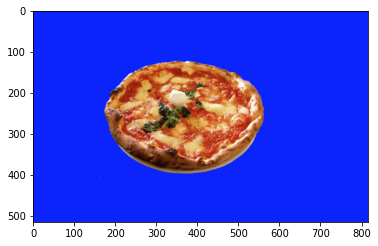

In [ ]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)

### Defining a color threshold

In [ ]:
# we wish to define boundaries using RGB color values and tweek this values to completely isolate the background

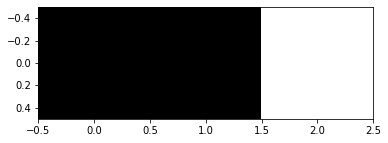

In [ ]:
lower_blue = np.array([0,0,200]) 
upper_blue = np.array([250,250,255])

### Creat a mask

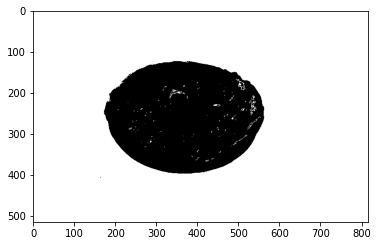

In [ ]:
# the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
plt.imshow(mask, cmap='gray')

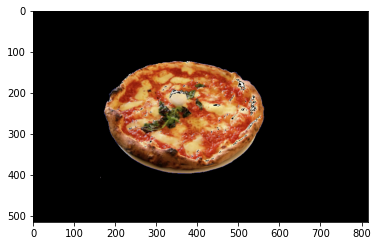

In [ ]:
# mask the image t let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0,0,0]

# Display it!
plt.imshow(masked_image)

### including a background image

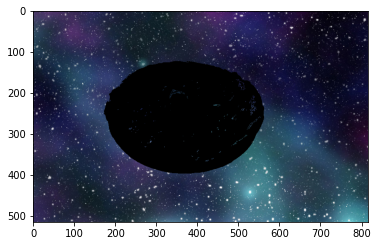

In [ ]:
# Load background image, and convert it to RGB
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

#Crop it to the right size (514*816)
crop_background = background_image[0:514, 0:816]

#mask the cropped background so that the pizza are is blocked 
crop_background[mask==0] = [0,0,0]

# Display the background
plt.imshow(crop_background)

### Create a complete image

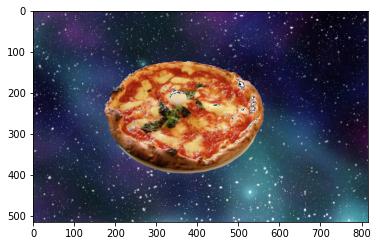

In [ ]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)

### Working with HSV images

### color space balloons

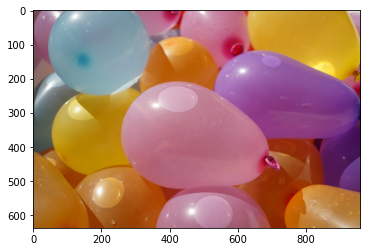

In [ ]:
# Reading in the image
image = cv2.imread('images/water_balloons.jpg')

#always make copy of image
image_copy = np.copy(image)

#switch from BGR to RGB
image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image, cmap='gray')

### desegement and plot color channels

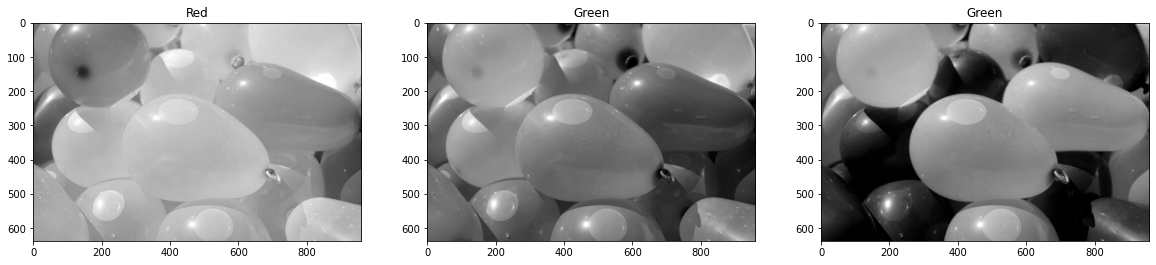

In [ ]:
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Green')
ax3.imshow(b, cmap='gray')

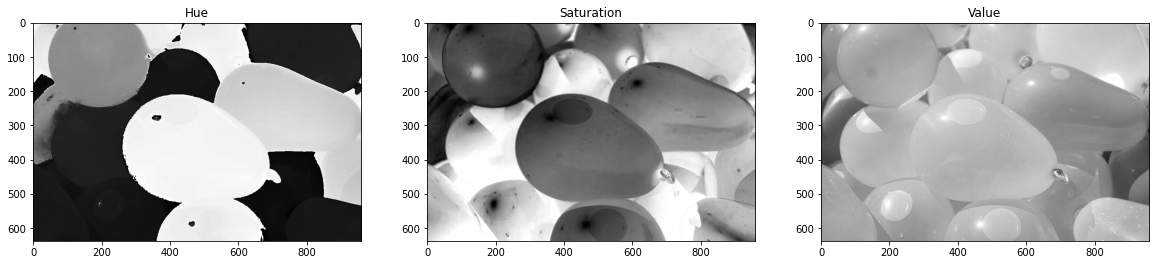

In [ ]:
#Switch from a RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# hsv channels

h = hsv[ :, :, 0]
s = hsv[ :, :, 1]
v = hsv[ :, :, 2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,10))
ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

## Defining pink and hue selection thresholds

In [ ]:
# defining our color selection criteria in HSV values
lower_hue = np.array([160,0,0])
upper_hue = np.array([180, 255,255])

In [ ]:
# defining our color selection criteria in RGB values
lower_pink = np.array([180,0,100])
upper_pink = np.array([255, 255,235])

#Masking the image

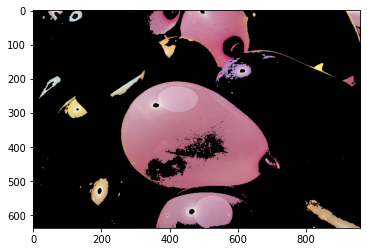

In [ ]:
mask_rgb = cv2.inRange(image, lower_pink, upper_pink)

# mask the image
masked_image = np.copy(image)
masked_image[mask_rgb==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

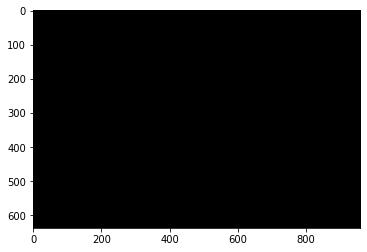

In [ ]:
#retrying the masking with hsv
#make area definition 
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# mask the image
masked_image = np.copy(image)
masked_image[mask_hsv==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

## Day and Night Image Classifier

The attached day/night directory contains 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images. 

We would like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!
All images come from the AMOS dataset (Archive of Many Outdoor Scenes)

### Training and Testing the data

The 200 data set has already been subdivided 
  60% of these images are training images, for you to use as you create a classifier.
  40% are test images, which will be used to test the accuracy of your classifier.
First, we set some variables to keep track of some where our images are stored:

  image_dir_training: the directory where our training  image data is stored
image_dir_test: the directory where our test image data is stored

In [ ]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

### Loading datasets 

These first few lines of code will load the training day/night images and store all of them in a variable, IMAGE_LIST. This list contains the images and their associated label ("day" or "night").

For example, the first image-label pair in IMAGE_LIST can be accessed by index: IMAGE_LIST[0][:].

In [ ]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers_.load_dataset(image_dir_training)

1. Visualize the input images

'night'

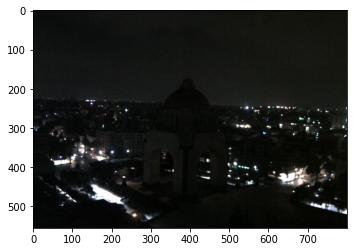

In [ ]:
# Select an image and its label by list index
image_index = 150
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

plt.imshow(selected_image)
selected_label

## TODO: Print out 1. The shape of the image and 2. The image's label `selected_label`

## TODO: Display a night image
# Note the differences between the day and night images
# Any measurable differences can be used to classify these images

## Preprocessing

### Standardising the input data

In [ ]:
# This function takes an RGB image and return a new, standardized version
def standardize_input(image):
    
    ## Resizes image so that all "standard" images are the same size 600x1100 (hxw) 
    standard_im = image[0:600, 0:1100]
    
    return standard_im

### Standardises the output 

Here we specify the expected output. We want to use binary values of 0's for nights and 1's for days

In [ ]:
# Examples: 
# encode("day") should return: 1
# encode("night") should return: 0

def encode(label):
        
    numerical_val = 0
    if label == 'day':
      numerical_val = 1
    else:
      numerical_val = 0
    
    return numerical_val

### Construct a STANDARDIZED_LIST of input images and output labels.

This function takes in a list of image-label pairs and outputs a standardized list of resized images and numerical labels.

This uses the functions we defined above to standardize the input and output, this is a way of checking the accuracy of our functions.

In [ ]:
def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # Create a numerical label
        binary_label = encode(label)    

        # Append the image, and it's one hot encoded label to the full, processed list of image data 
        standard_list.append((standardized_im, binary_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

## Visualize the standardized data
Display a standardized image from STANDARDIZED_LIST.

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


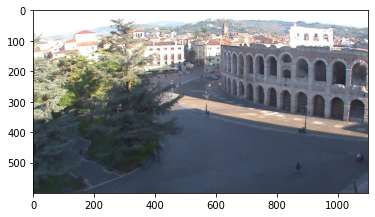

In [ ]:
# Display a standardized image and its label

# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))

## Feature Extraction

we will create a feature that represents the brightness in an image. We'll be extracting the average brightness using HSV colorspace. Specifically, we'll use the V channel (a measure of brightness), add up the pixel values in the V channel, then divide that sum by the area of the image to get the average Value of the image.

### RGB to HSV conversion
Below, a test image is converted from RGB to HSV colorspace and each component is displayed in an image.



Label: 1


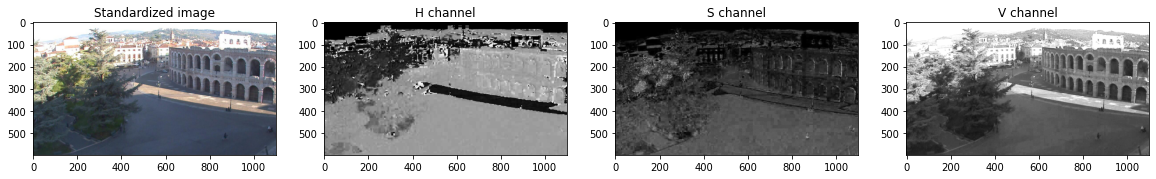

In [ ]:
# Convert an image to HSV colorspace
# Visualize the individual color channels

image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

# Convert to HSV
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

# Print image label
print('Label: ' + str(test_label))

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(test_im)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')


### Find the average brightness using the V channel
This function takes in a standardized RGB image and returns a feature (a single value) that represent the average level of brightness in the image. We'll use this value to classify the image as day or night.

In [ ]:
# Find the average Value or brightness of an image
def avg_brightness(rgb_image):
    
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:,:,2])
    
    ## TODO: Calculate the average brightness using the area of the image
    # and the sum calculated above
    avg = (sum_brightness)/(600 * 1100) # sum /area

    
    return avg

Avg brightness: 63.14503484848485


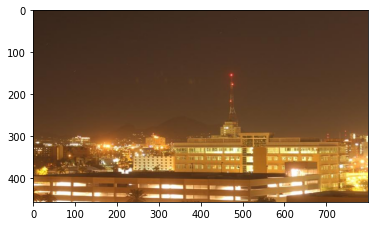

In [ ]:
# Testing average brightness levels
# Look at a number of different day and night images and think about 
# what average brightness value separates the two types of images

# As an example, a "night" image is loaded in and its avg brightness is displayed
image_num = 190
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)

###Classification and Visualizing Error
In this section, we'll turn our average brightness feature into a classifier that takes in a standardized image and returns a predicted_label for that image. This estimate_label function should return a value: 0 or 1 (night or day, respectively).

#### We want to build a classifier and set a threshhold that will separate the day and night images.

In [ ]:
# This function should take in RGB image input
def estimate_label(rgb_image):
    
    # extracting average brightness feature from an RGB image 
    avg_ = avg_brightness(rgb_image)

    # Using the avg brightness feature to predict a label (0, 1)
    threshold = 50

    if avg_ > threshold :
      predicted_label = 0
    else:
      predicted_label = 1
    
    return predicted_label    
    

### Testing the Model

Shape: (469, 640, 3)
Label [1 = day, 0 = night]: 0 and prediction is :1


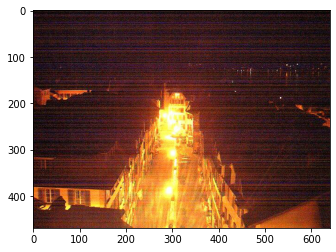

In [ ]:
# Display a standardized image and its label and its prediction

# Select an image by index
image_num = 207
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label) + ' and prediction is :' + str(estimate_label(selected_image)))

## Testing our classifier
Here is where we test our classification algorithm using our test set of data that we set aside at the beginning of the notebook!

Since we are using a pretty simple brightess feature, we may not expect this classifier to be 100% accurate. We'll aim for around 75-85% accuracy usin this one feature.

### Test dataset
Below, we load in the test dataset, standardize it using the standardize function we defined above, and then shuffle it; this ensures that order will not play a role in testing accuracy.

In [ ]:

# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = helpers_.load_dataset(image_dir_test)

# Standardize the test data
STANDARDIZED_TEST_LIST = helpers_.standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

### Determining the Accuracy
Comparing the output of our classification algorithm  with the true labels and determine the accuracy.

This code stores all the misclassified images, their predicted labels, and their true labels, in a list called misclassified.



In [ ]:
# Constructs a list of misclassified images given a list of test images and their labels
def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]

        # Get predicted label from your classifier
        predicted_label = estimate_label(im)

        # Compare true and predicted labels 
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels

In [ ]:
# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

Accuracy: 0.25625
Number of misclassified images = 119 out of 160


### Visualize the misclassified images
Visualize some of the images you classified wrong (in the MISCLASSIFIED list) and note any qualities that make them difficult to classify. This will help you identify any weaknesses in your classification algorithm.

0


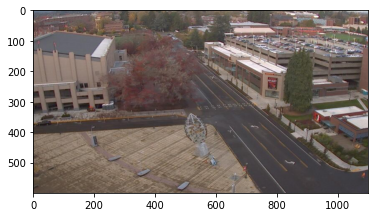

In [ ]:
# Visualize misclassified example(s)
## TODO: Display an image in the `MISCLASSIFIED` list 
## TODO: Print out its predicted label - to see what the image *was* incorrectly classified as5
num = 0
test_mis_im = MISCLASSIFIED[num][0]
plt.imshow(test_mis_im)
print(str(MISCLASSIFIED[num][1]))

### Improving our algorithm 
weakness: we randomly chose a value of 50 for our threshold 
visualizing the misclasified we see we have been overly simplistic
here domain knowledge of image processing is neccessary. That is your homework.

### Conclusion

  We have gone through the very basics of computer vision and image processing. We have tested a complete machine learning workflow from data input, Image pre-processing, Feature engineering, Prediction and Accuracy assessment. This is however just the begining. In the next module we will be diving deep into complex classifiers, deep learning architectures and advanced feature extraction. Let this not scare you. No rocket science here.